<a href="https://colab.research.google.com/github/zilioalberto/Ciencia_De_Dados_Analise_Exploratoria_Parte_01/blob/main/Eda_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alunos:
## Alberto Zilio
## Roni Pereira
# Disciplina: Ciencia de Dados

In [15]:
#Bibliotecas

!pip install -q pandas seaborn matplotlib openpyxl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np


In [16]:
# Passo 01 - Carregamento e Diagnóstic0

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 120)

# Caminhos
CAMINHO_LOCAL = "/content/Telco-Customer-Churn.csv"
URL_RAW = "https://raw.githubusercontent.com/zilioalberto/Ciencia_De_Dados_Analise_Exploratoria_Parte_01/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Carregar
if os.path.exists(CAMINHO_LOCAL):
    df_churn = pd.read_csv(CAMINHO_LOCAL, low_memory=False)
else:
    df_churn = pd.read_csv(URL_RAW, low_memory=False)

# Tratamentos básicos recomendados pelo enunciado:
# - TotalCharges pode ter espaços -> converter para número (coercion vira NaN onde houver lixo)
if "TotalCharges" in df_churn.columns:
    df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors="coerce")

# Diagnóstico rápido
print("Dimensão:", df_churn.shape)
print("\n=== .info() ===")
df_churn.info()

print("\n=== .describe(numéricas) ===")
display(df_churn.select_dtypes(include="number").describe().T)

print("\n=== Primeiras linhas ===")
display(df_churn.head())

print("\n=== Valores ausentes (contagem) ===")
missing = df_churn.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

Dimensão: (7043, 21)

=== .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80



=== Primeiras linhas ===


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



=== Valores ausentes (contagem) ===


,0
TotalCharges,11


Contagem por classe:


,count
Churn,
No,5174
Yes,1869



Percentual por classe:


,%
Churn,
No,73.46
Yes,26.54


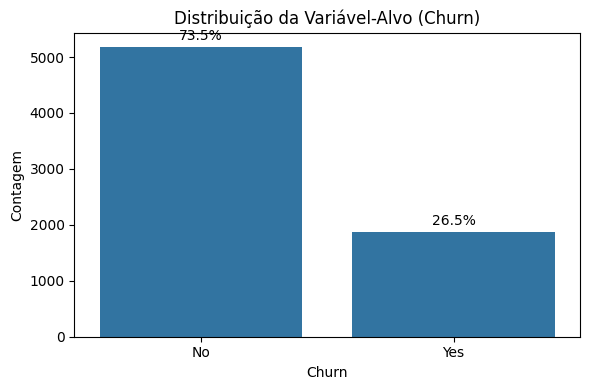

In [17]:
# Passo 02  - Análise da Variável-Alvo (Churn)

# Garantir tipo string para evitar surpresas
df_churn['Churn'] = df_churn['Churn'].astype(str)

# Contagem absoluta e percentual
contagem = df_churn['Churn'].value_counts(dropna=False)
percentual = (contagem / len(df_churn) * 100).round(2)

print("Contagem por classe:")
display(contagem.to_frame('count'))
print("\nPercentual por classe:")
display(percentual.to_frame('%'))

# Gráfico
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df_churn, order=contagem.index)
plt.title('Distribuição da Variável-Alvo (Churn)')
plt.xlabel('Churn'); plt.ylabel('Contagem')

# Anotar percentuais nas barras
for p in ax.patches:
    altura = p.get_height()
    pct = 100 * altura / len(df_churn)
    ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2., altura),
                ha='center', va='bottom', xytext=(0,3), textcoords='offset points')
plt.tight_layout()
plt.show()


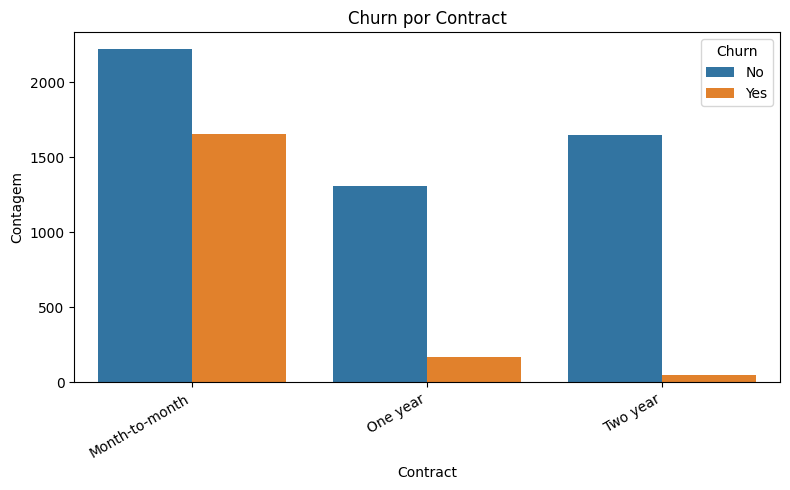

Percentual de Churn por Contract (%):


Churn,No,Yes
Contract,,
Month-to-month,57.3,42.7
One year,88.7,11.3
Two year,97.2,2.8


--------------------------------------------------------------------------------


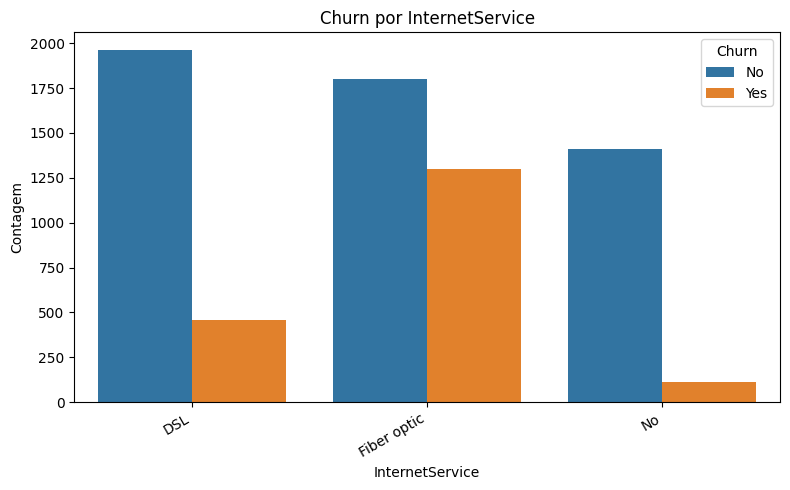

Percentual de Churn por InternetService (%):


Churn,No,Yes
InternetService,,
DSL,81.0,19.0
Fiber optic,58.1,41.9
No,92.6,7.4


--------------------------------------------------------------------------------


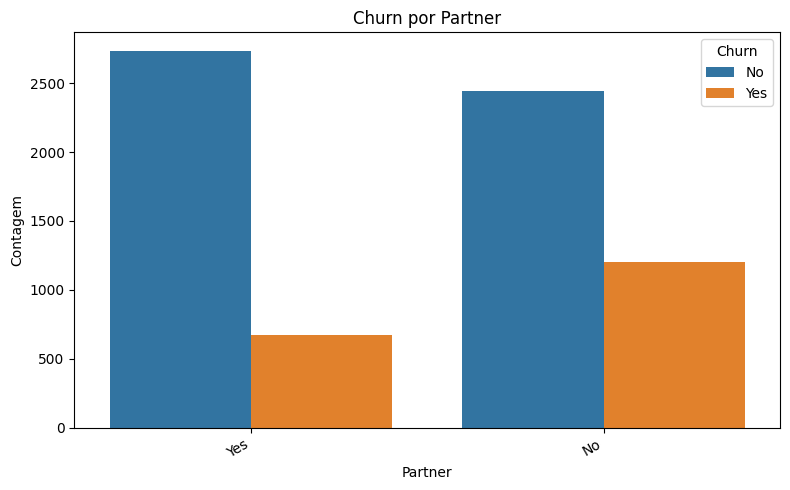

Percentual de Churn por Partner (%):


Churn,No,Yes
Partner,,
No,67.0,33.0
Yes,80.3,19.7


--------------------------------------------------------------------------------


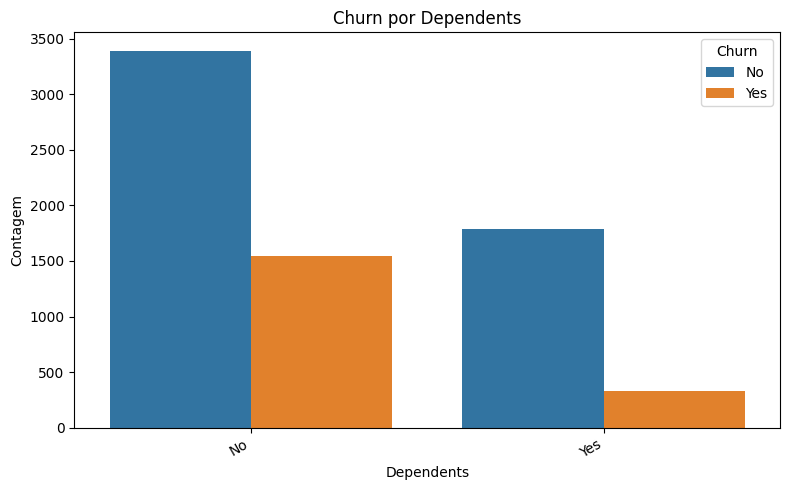

Percentual de Churn por Dependents (%):


Churn,No,Yes
Dependents,,
No,68.7,31.3
Yes,84.5,15.5


--------------------------------------------------------------------------------


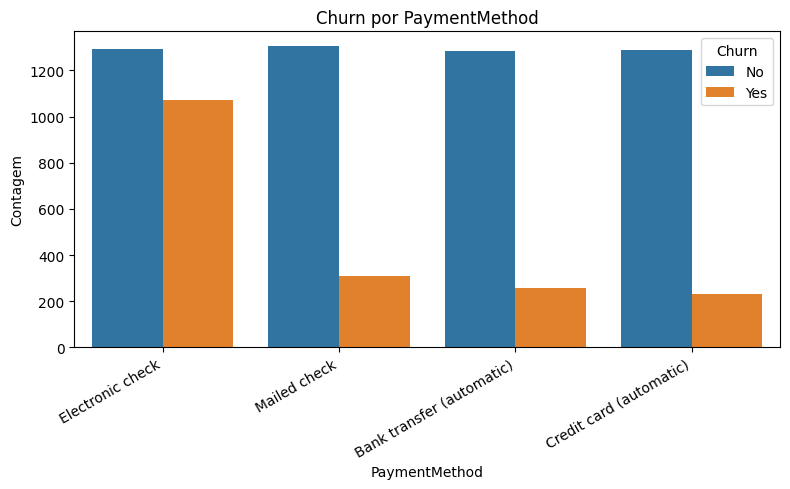

Percentual de Churn por PaymentMethod (%):


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.3,16.7
Credit card (automatic),84.8,15.2
Electronic check,54.7,45.3
Mailed check,80.9,19.1


--------------------------------------------------------------------------------


In [18]:
# Passo 03: Relação entre Variáveis Categóricas vs Churn


cat_vars = ['Contract', 'InternetService', 'Partner', 'Dependents', 'PaymentMethod']
cat_vars = [c for c in cat_vars if c in df_churn.columns]

for col in cat_vars:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=col, hue='Churn', data=df_churn)
    plt.title(f'Churn por {col}')
    plt.xlabel(col); plt.ylabel('Contagem')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

    # Tabela percentual por categoria (normalizada por linha)
    ct = pd.crosstab(df_churn[col], df_churn['Churn'], normalize='index') * 100
    ct = ct.round(1)
    print(f'Percentual de Churn por {col} (%):')
    display(ct)
    print('-'*80)


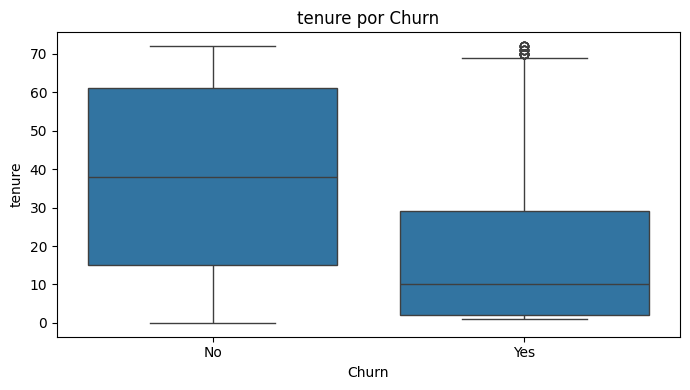

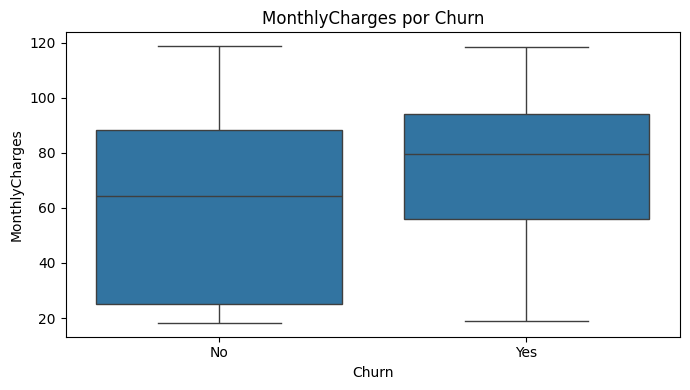

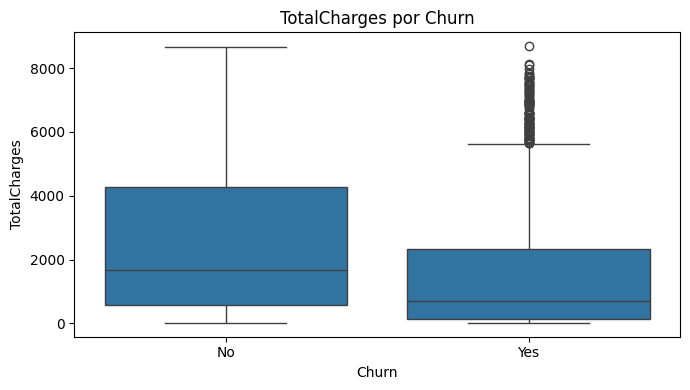

tenure                               MonthlyCharges             \
      median       mean        std min max         median       mean   
Churn                                                                  
No      38.0  37.569965  24.113777   0  72         64.425  61.265124   
Yes     10.0  17.979133  19.531123   1  72         79.650  74.441332   

                                TotalCharges                                   \
             std    min     max       median         mean          std    min   
Churn                                                                           
No     31.092648  18.25  118.75      1683.60  2555.344141  2329.456984  18.80   
Yes    24.666053  18.85  118.35       703.55  1531.796094  1890.822994  18.85   

                
           max  
Churn           
No     8672.45  
Yes    8684.80

In [19]:
# Passo 04: Relação entre Variáveis Numéricas e o Churn


# Garantir que TotalCharges foi coerida para número (Passo 01 já trata; mas reforçamos)
if 'TotalCharges' in df_churn.columns:
    df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
num_vars = [c for c in num_vars if c in df_churn.columns]

for col in num_vars:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='Churn', y=col, data=df_churn)
    plt.title(f'{col} por Churn')
    plt.tight_layout()
    plt.show()

# Estatísticas resumidas por grupo
resumo = df_churn.groupby('Churn')[num_vars].agg(['median','mean','std','min','max'])
display(resumo)


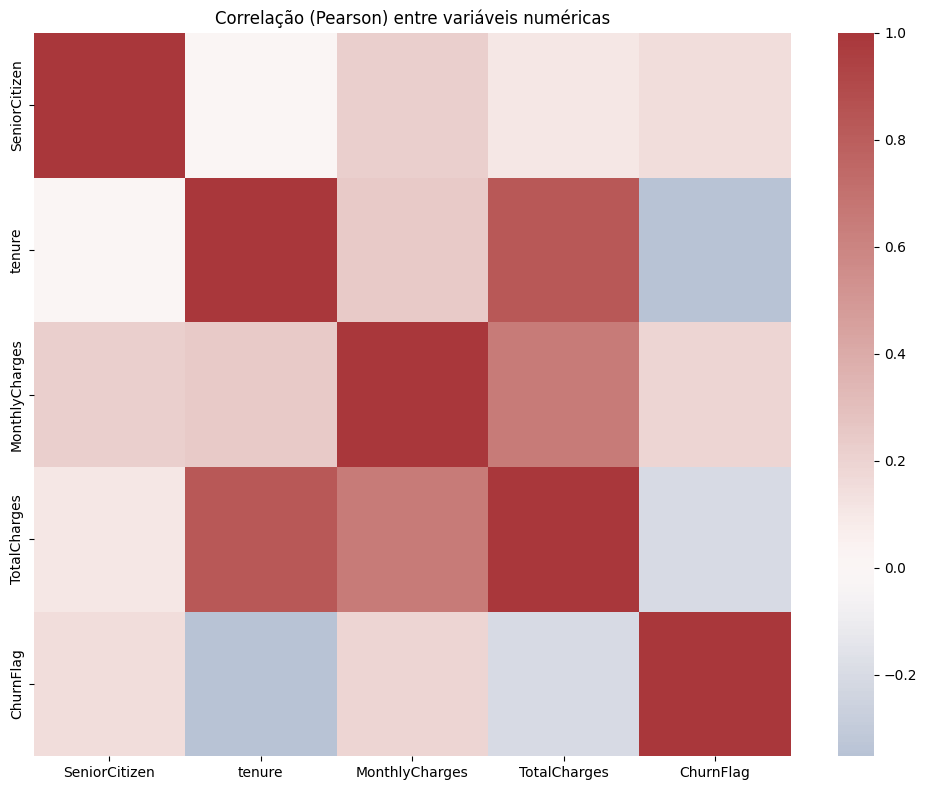

Correlação com ChurnFlag (top 10 em valor absoluto):


,ChurnFlag
ChurnFlag,1.000000
tenure,-0.352229
TotalCharges,-0.199484
MonthlyCharges,0.193356
SeniorCitizen,0.150889


In [20]:
# Passo 05: Correlação/Associação

df_corr = df_churn.copy()

# Converter alvo para 0/1 para mirar correlação com numéricas
df_corr['ChurnFlag'] = (df_corr['Churn'].astype(str).str.upper() == 'YES').astype(int)

num_cols = df_corr.select_dtypes(include='number').columns.tolist()

# Correlações de Pearson entre numéricas e ChurnFlag
corr = df_corr[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='vlag', center=0)
plt.title('Correlação (Pearson) entre variáveis numéricas')
plt.tight_layout()
plt.show()

# Ordenar correlação com o alvo
corr_target = corr['ChurnFlag'].sort_values(ascending=False)
print('Correlação com ChurnFlag (top 10 em valor absoluto):')
display(corr_target.reindex(corr_target.abs().sort_values(ascending=False).index).head(10))
